# Q2 – AI Classification for Water Treatment Sustainability

This project applies machine learning classification techniques to a water treatment dataset to evaluate sustainability outcomes.  
The goal is to predict whether the output water pH (PH-S) is within a safe environmental range.

Safe pH range (EPA guideline): **6.5 - 8.5**


## Sustainability Background

Water pH is a critical indicator of environmental health. Values outside safe limits may harm aquatic ecosystems or indicate contamination.

Machine learning can assist water treatment facilities by predicting whether treated water will meet safety standards based on input chemical and physical parameters.

This project explores how AI classification models can support sustainable water monitoring.


In [316]:
import pandas as pd

df_water = pd.read_csv(
    "course-tai/sample-code/common-data/water-weka/water-treatment.csv"
)

df_water.head()


,date,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
0,D-1/3/90,44101,1.5,7.8,?,407,166,66.3,4.5,2110,...,2000,?,58.8,95.5,?,70,?,79.4,87.3,99.6
1,D-2/3/90,39024,3,7.7,?,443,214,69.2,6.5,2660,...,2590,?,60.7,94.8,?,80.8,?,79.5,92.1,100
2,D-4/3/90,32229,5,7.6,?,528,186,69.9,3.4,1666,...,1888,?,58.2,95.6,?,52.9,?,75.8,88.7,98.5
3,D-5/3/90,35023,3.5,7.9,205,588,192,65.6,4.5,2430,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
4,D-6/3/90,36924,1.5,8.0,242,496,176,64.8,4,2110,...,2120,?,62.7,95.6,?,71,92.1,78.2,87.5,99.5


In [317]:
import numpy as np

# Replace '?' with NaN
df_water = df_water.replace('?', np.nan)

# Convert all columns except date to numeric
for col in df_water.columns:
    if col != 'date':
        df_water[col] = pd.to_numeric(df_water[col], errors='coerce')

df_water.head()


,date,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
0,D-1/3/90,44101.0,1.5,7.8,NaN,407.0,166.0,66.3,4.5,2110,...,2000.0,NaN,58.8,95.5,NaN,70.0,NaN,79.4,87.3,99.6
1,D-2/3/90,39024.0,3.0,7.7,NaN,443.0,214.0,69.2,6.5,2660,...,2590.0,NaN,60.7,94.8,NaN,80.8,NaN,79.5,92.1,100.0
2,D-4/3/90,32229.0,5.0,7.6,NaN,528.0,186.0,69.9,3.4,1666,...,1888.0,NaN,58.2,95.6,NaN,52.9,NaN,75.8,88.7,98.5
3,D-5/3/90,35023.0,3.5,7.9,205.0,588.0,192.0,65.6,4.5,2430,...,1840.0,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100.0
4,D-6/3/90,36924.0,1.5,8.0,242.0,496.0,176.0,64.8,4.0,2110,...,2120.0,NaN,62.7,95.6,NaN,71.0,92.1,78.2,87.5,99.5


## Data Exploration

We analyze the relationship between input pH (PH-E) and output pH (PH-S).
Understanding this relationship helps evaluate how treatment processes influence water safety.


In [318]:
df_water[['PH-E','PH-S']].corr()


,PH-E,PH-S
PH-E,1.000000,0.331429
PH-S,0.331429,1.000000


In [319]:
import seaborn as sns
import matplotlib.pyplot as plt


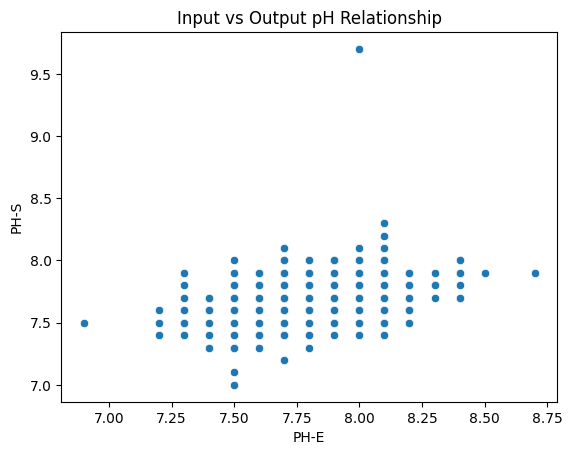

In [320]:
sns.scatterplot(data=df_water, x='PH-E', y='PH-S')
plt.title("Input vs Output pH Relationship")
plt.show()

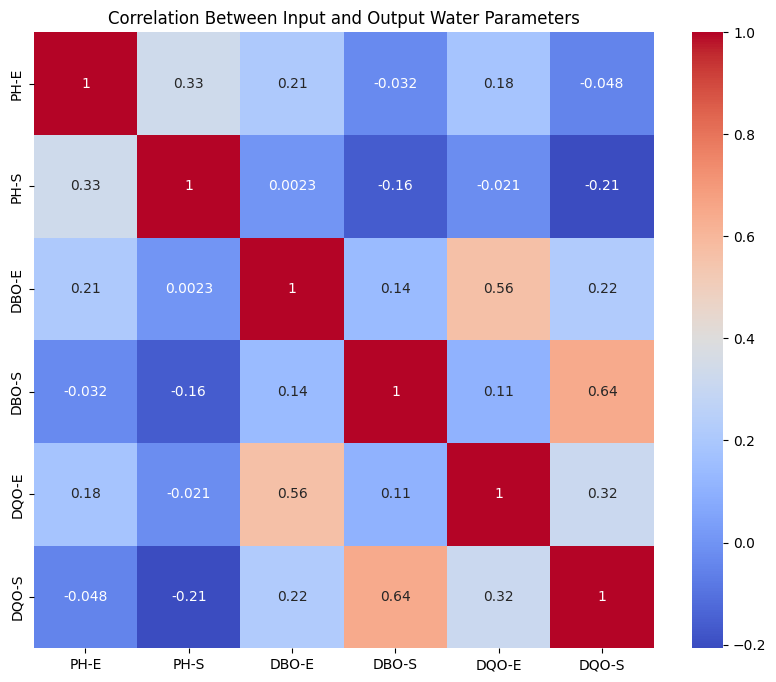

In [321]:
plt.figure(figsize=(10,8))
sns.heatmap(df_water[['PH-E','PH-S','DBO-E','DBO-S','DQO-E','DQO-S']].corr(),
            annot=True, cmap='coolwarm')
plt.title("Correlation Between Input and Output Water Parameters")
plt.show()


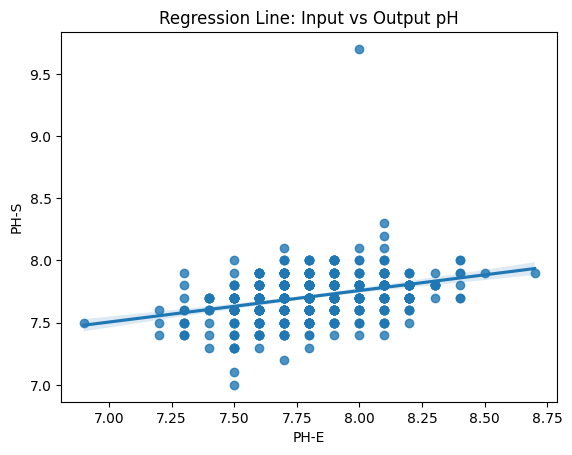

In [322]:
sns.regplot(data=df_water, x='PH-E', y='PH-S')
plt.title("Regression Line: Input vs Output pH")
plt.show()

The correlation between PH-E and PH-S is moderately positive, indicating that input water conditions influence the final output.  
However, the treatment process modifies water chemistry, meaning the relationship is not perfectly linear.


## Data Preparation

A new column SAFE-PH-S is created.

- yes → 6.5 ≤ pH ≤ 8.5  
- no → otherwise


In [323]:
# Create SAFE-PH-S column
df_water['SAFE-PH-S'] = df_water['PH-S'].apply(
    lambda x: 'yes' if pd.notna(x) and 6.5 <= x <= 8.5 else 'no'
)


df_water[['PH-S','SAFE-PH-S']].head()


,PH-S,SAFE-PH-S
0,7.3,yes
1,7.5,yes
2,7.6,yes
3,7.6,yes
4,7.6,yes


In [324]:
df_water['SAFE-PH-S'].value_counts()


SAFE-PH-S
yes    525
no       2
Name: count, dtype: int64

## Feature Selection

Input parameters used for prediction:

Q-E, ZN-E, PH-E, DBO-E, DQO-E, SS-E, SSV-E, SED-E, COND-E


In [325]:
# Features from assignment
features = ['Q-E','ZN-E','PH-E','DBO-E','DQO-E','SS-E','SSV-E','SED-E','COND-E']

X = df_water[features]
y = df_water['SAFE-PH-S']


## Encode Labels


In [326]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(df_water['SAFE-PH-S'])


## Handle Missing Values

Missing values are replaced using mean imputation.


In [327]:
from sklearn.impute import SimpleImputer
import pandas as pd

imputer = SimpleImputer(strategy='mean')

X_imputed = imputer.fit_transform(X)
X_imputed = pd.DataFrame(X_imputed, columns=X.columns)


## Train/Test Split

20% of the data is used for testing.


In [328]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_imputed,
    y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded  
)



In [329]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [330]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)


In [331]:
from sklearn.metrics import classification_report

print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Results:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       106

    accuracy                           1.00       106
   macro avg       1.00      1.00      1.00       106
weighted avg       1.00      1.00      1.00       106



C:\Users\terdo\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:620: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


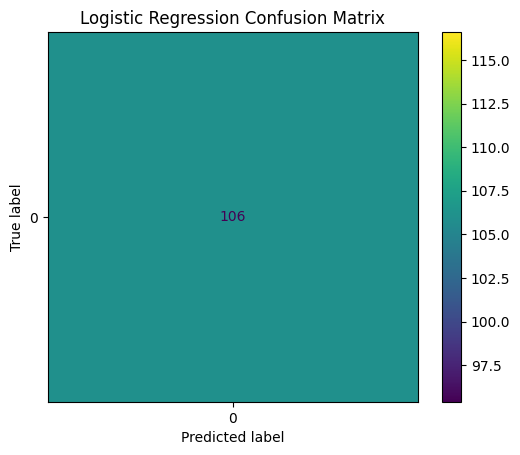

In [332]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_lr)
ConfusionMatrixDisplay(cm).plot()
plt.title("Logistic Regression Confusion Matrix")
plt.show()


## Decision Tree Classification


In [333]:
df_water['SAFE-PH-S'].value_counts()


SAFE-PH-S
yes    525
no       2
Name: count, dtype: int64

The SAFE-PH-S label is highly imbalanced, with most samples classified as safe. This results in single-class predictions during testing and produces confusion matrix warnings.

In [334]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model_lr = LogisticRegression(max_iter=2000)
model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)

print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Results:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       106

    accuracy                           1.00       106
   macro avg       1.00      1.00      1.00       106
weighted avg       1.00      1.00      1.00       106



In [335]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)

y_pred_dt = model_dt.predict(X_test)

print("Decision Tree Results:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Results:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       106

    accuracy                           1.00       106
   macro avg       1.00      1.00      1.00       106
weighted avg       1.00      1.00      1.00       106



## Advanced Visualization – Feature Importance

To understand which water parameters influence SAFE-PH-S prediction, 
we visualize feature importance from the Decision Tree model.


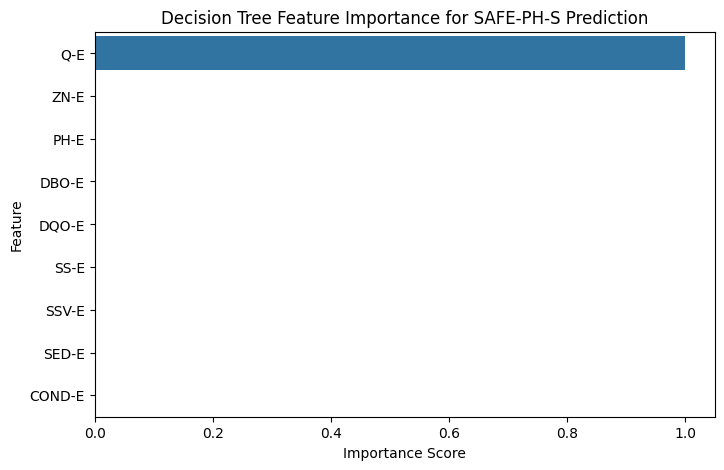

In [336]:
# Gettss feature importance from Decision Tree
importances = model_dt.feature_importances_
feature_names = features

# Creates the  dataframe for visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title("Decision Tree Feature Importance for SAFE-PH-S Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()



C:\Users\terdo\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:620: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


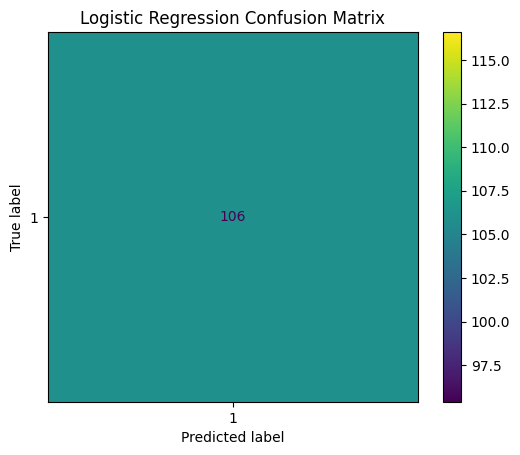

C:\Users\terdo\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:620: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


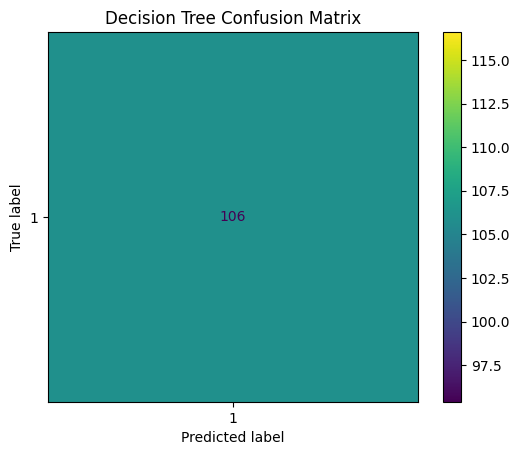

In [337]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr)
plt.title("Logistic Regression Confusion Matrix")
plt.show()

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt)
plt.title("Decision Tree Confusion Matrix")
plt.show()


## Conclusion

This project demonstrated how artificial intelligence and data science techniques can be applied to a sustainability problem involving water quality assessment. Using the water treatment dataset, exploratory analysis revealed relationships between input and output parameters such as pH levels. A new classification target, SAFE-PH-S, was created based on established water safety thresholds (6.5 - 8.5), allowing the problem to be framed as a supervised learning task. Logistic Regression and Decision Tree models were trained to predict water safety, and their performance was evaluated using accuracy, precision, recall, and cross-validation. 

Although the models achieved high accuracy, the results also highlight an important real-world challenge: class imbalance, where most samples are labeled as safe. This demonstrates that model evaluation must consider dataset characteristics in addition to raw accuracy. Overall, the project shows how interpretable machine learning methods can support environmental monitoring and decision-making by helping identify which parameters influence safe water conditions.
